In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
music_df=pd.read_csv('../data/mlc_sample.csv')

In [3]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   ISRC                                       98240 non-null   object 
 1   Country Code                               98303 non-null   object 
 2   Registrant Code                            98303 non-null   object 
 3   Year of Reference                          98239 non-null   float64
 4   Usage Period                               91898 non-null   object 
 5   Streaming Platform (DSP)                   96001 non-null   object 
 6   Streams                                    100000 non-null  object 
 7   Recording Artist                           100000 non-null  object 
 8   Recording Label                            98992 non-null   object 
 9   Recording Title                            100000 non-null  object 
 10  Release T

In [4]:
#nulls=music_null.groupby(['Streaming Platform (DSP)'], as_index=False).agg({'ISRC':'count'})
#music_null.head(15)

In [5]:
music_df.rename(columns={'If ': 'ISRC'})

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,549",Myuk,Sony Music Labels Inc.,魔法 - Anime Size,魔法 (Anime Size),89,1
99996,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99997,SE6HN1926755,SE,6HN,19.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99998,SEYOK1669274,SE,YOK,16.0,3/1/2021,Apple,"8,970",yama,Sony Music Labels Inc.,麻痺,麻痺 - Single,198,1


In [6]:
music_df.rename(columns={music_df.columns[12]: 'ListsWriters'}, inplace=True) #renames songwriter column 
nowriter=music_df.loc[(music_df['ListsWriters']==0)] #finds only records where there's no songwriter
nowriter=nowriter.groupby(['Streaming Platform (DSP)'], as_index=False).agg({'ListsWriters':'count'}) #aggregates by platform

In [7]:
nowriter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Streaming Platform (DSP)  28 non-null     object
 1   ListsWriters              28 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 576.0+ bytes


In [8]:
nowriter['pct_missing_writer_by_platform'] = (nowriter.ListsWriters/100000)*100
nowriter
nowriter.rename(columns={nowriter.columns[1]: 'no_writer_listed'})

,Streaming Platform (DSP),no_writer_listed,pct_missing_writer_by_platform
0,Amazon,10659,10.659
1,Anghami,46,0.046
2,Apple,4251,4.251
3,AudioMack,550,0.550
4,Deezer,7,0.007
5,Fan Label,4,0.004
6,GTL,1059,1.059
7,LiveXLive,186,0.186
8,Melodyv,734,0.734
9,Midwest Tape,102,0.102


In [9]:
music_null = music_df[music_df.isna().any(axis=1)] #filters to rows where there's at least one null value in any column
music_null.head()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),ListsWriters
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
26,GBAHS2100229,GB,AHS,21.0,NaN,YouTube,"12,560",Bad Bunny|Benito Antonio Martinez,Rimas Entertainment LLC,¿Quien Tu Eres?,X 100PRE,160,0


In [10]:
nulls=music_null.groupby(['Streaming Platform (DSP)'], as_index=False).agg({'ISRC':'count'})
music_null.head(15)

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),ListsWriters
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
26,GBAHS2100229,GB,AHS,21.0,NaN,YouTube,"12,560",Bad Bunny|Benito Antonio Martinez,Rimas Entertainment LLC,¿Quien Tu Eres?,X 100PRE,160,0
38,USSM12102187,US,SM1,21.0,NaN,NaN,"12,296",Miguel,Sony Music,...All,Art Dealer Chic 2,239,0
84,NaN,NaN,NaN,NaN,1/1/2021,Pandora,"10,888",L.T.D.,UNI/MOTOWN,(Everytime I Turn Around) Back In Love Again,Single::(Everytime I Turn Around) Back In Love...,219,0
116,USUM72024684,US,UM7,20.0,NaN,NaN,"2,941",Lord Huron,Republic Records,(One Helluva Performer),Long Lost,22,0
138,USUYG1360358,US,UYG,13.0,4/1/2021,Deezer,2,Unknown,NaN,{Cartagena},Silvestre Dangond - Grandes Éxitos,356461,0
139,USUM72105617,US,UM7,21.0,4/1/2021,Deezer,2,Unknown,NaN,{Esa Mujer},Silvestre Dangond - Grandes Éxitos,356461,0


In [11]:
music_df["ISRC"].fillna(" ", inplace = True)
music_df["Country Code"].fillna(" ", inplace = True)
music_df["Registrant Code"].fillna(" ", inplace = True)
music_df["Year of Reference"].fillna(" ", inplace = True)
music_df["Usage Period"].fillna(" ", inplace = True)
music_df["Streaming Platform (DSP)"].fillna(" ", inplace = True)
music_df["Streams"].fillna(" ", inplace = True)
music_df["Recording Artist"].fillna(" ", inplace = True)
music_df["Recording Label"].fillna(" ", inplace = True)
music_df["Recording Title"].fillna(" ", inplace = True)
music_df["Release Title"].fillna(" ", inplace = True)
music_df["Recording Duration (Seconds)"].fillna(" ", inplace = True)

In [12]:
music_df=music_df.set_axis(["ISRC","Country","Registrant","Year","UsePeriod","Platform","Streams","Artist","Label","RecordingName","ReleaseName","Length","ListsWriters"], axis=1)

In [13]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ISRC           100000 non-null  object
 1   Country        100000 non-null  object
 2   Registrant     100000 non-null  object
 3   Year           100000 non-null  object
 4   UsePeriod      100000 non-null  object
 5   Platform       100000 non-null  object
 6   Streams        100000 non-null  object
 7   Artist         100000 non-null  object
 8   Label          100000 non-null  object
 9   RecordingName  100000 non-null  object
 10  ReleaseName    100000 non-null  object
 11  Length         100000 non-null  int64 
 12  ListsWriters   100000 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 9.9+ MB


In [14]:
music_df.isnull().sum() #checks for null values across whole df 

ISRC             0
Country          0
Registrant       0
Year             0
UsePeriod        0
Platform         0
Streams          0
Artist           0
Label            0
RecordingName    0
ReleaseName      0
Length           0
ListsWriters     0
dtype: int64

In [15]:
music_df.head()

,ISRC,Country,Registrant,Year,UsePeriod,Platform,Streams,Artist,Label,RecordingName,ReleaseName,Length,ListsWriters
0,USUG12101043,US,UG1,21.0,,AudioMack,"10,175",Future,,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,,AudioMack,"62,105",Foolio,,WHEN I SEE YOU REMIX,#unknown#,187,0


In [16]:
music_df['Streams'] = music_df['Streams'].astype(str) #convert streams to string in order to replace comma
music_df['Streams']=music_df['Streams'].str.replace(',','') #replace comma with nothing
music_df['Streams'] = music_df['Streams'].astype(int) #convert to integer

In [17]:
music_df.head()

,ISRC,Country,Registrant,Year,UsePeriod,Platform,Streams,Artist,Label,RecordingName,ReleaseName,Length,ListsWriters
0,USUG12101043,US,UG1,21.0,,AudioMack,10175,Future,,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,,AudioMack,62105,Foolio,,WHEN I SEE YOU REMIX,#unknown#,187,0


In [18]:
test=music_df.loc[(music_df['UsePeriod']==' ')] #testing the difference between '' and ' ' -> I need to use ' ' to find blanks
test.head()

,ISRC,Country,Registrant,Year,UsePeriod,Platform,Streams,Artist,Label,RecordingName,ReleaseName,Length,ListsWriters
0,USUG12101043,US,UG1,21.0,,AudioMack,10175,Future,,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
4,USAT22007048,US,AT2,20.0,,AudioMack,62105,Foolio,,WHEN I SEE YOU REMIX,#unknown#,187,0
26,GBAHS2100229,GB,AHS,21.0,,YouTube,12560,Bad Bunny|Benito Antonio Martinez,Rimas Entertainment LLC,¿Quien Tu Eres?,X 100PRE,160,0


for ind, row in people_df.iterrows():
    print('working on row: ', ind) #as it works, it will return "working on row + the index number of the row its working on"
    if row['sibling_count'] == 0: #if sibling count is 0, list "only"
        people_df.loc[ind, 'birth_category'] = 'only'
    elif row['birth_order'] == 1: #if birth category is 1, and sibling count is not 0 (checked for this in the first step), "oldest"
        people_df.loc[ind, 'birth_category'] ='oldest'
    elif row['birth_order'] > row['sibling_count']: #birth order is higher than sibling count indicates youngest child
        people_df.loc[ind, 'birth_category'] ='youngest'
    else:
        people_df.loc[ind, 'birth_category'] ='middle'
print('finished!')

In [19]:
platformstreams=music_df.groupby(['Platform'], as_index=False).agg({'Streams':'sum'})
print(platformstreams.head())

    Platform       Streams
0             4.703908e+07
1     Amazon  1.511998e+08
2    Anghami  3.468200e+04
3      Apple  1.606454e+09
4  AudioMack  1.199156e+07


In [20]:
topdsps=platformstreams[platformstreams['Platform'].isin(['Apple','Pandora','Spotify','Amazon'])]
topdsps.sort_values(by='Streams', ascending=False)

,Platform,Streams
23,Spotify,2.552564e+09
3,Apple,1.606454e+09
16,Pandora,8.742366e+08
1,Amazon,1.511998e+08


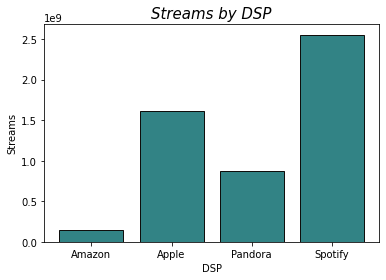

In [22]:
plt.bar(topdsps.Platform, topdsps.Streams, color="#328385", edgecolor="#0f0e0c")
plt.xlabel('DSP')
plt.ylabel('Streams')
plt.title(label='Streams by DSP', fontsize=15, fontstyle='oblique')
plt.show()